In [47]:
import xtrack as xt
import numpy as np
import matplotlib.pyplot as plt
import xobjects as xo
import matplotlib.patches as patches
from scipy import optimize as opti

In [202]:
pc_GeV = 20.0

circum = 2000.0 # circumference
ncell = 4*5 # number of cells, must be multiple of 4
fodo_bends = int(ncell-2*2-2*4-4)
lstraight = 250 #Length of straight cells
lcell = (circum-4*lstraight)/(ncell-4) # length of bending cells
print(lcell)
lq=3.0 # length of quadrupole
#number_dipoles_percell = 4
nnorm = (fodo_bends+4)*4. # 
print(nnorm)
theta = 2.0*np.pi/(nnorm) #(2.0*np.pi)/ncell/number_dipoles_percell
fcell = 3*lcell/4
lsex = 0.00001
ksf = +0.017041/ncell
ksd = -0.024714/ncell
f = 3*lstraight/4

beta_max = lcell*2
def fun(f, L, bmax):
    return (2*f*np.sqrt(4*f+L)/np.sqrt(4*f-L)-bmax)**2

f1 = opti.minimize(fun, x0=fcell, args=(lcell,beta_max))['x'][0]
k1 = 1/f1/lq
k1_match = k1/1.2
k1trip = k1*1.2
IPloc = (2*lstraight-lcell/2)/2
kflstored=0.028113570975156783
kdlstored=0.028120895434488813

62.5
32.0


In [229]:
env = xt.Environment()

env.vars({'lcell': lcell, 
          'lq': lq,
          'theta': theta,
          'kf': k1,
          'kd': -k1,
          'kfl': k1*lq,
          'kdl': -k1*lq,
          'lsex': lsex,
          'ksf': ksf,
          'ksd': ksd,
          
          'k1ftrip': k1trip,
          'k2dtrip': -k1trip,
          'k3ftrip': k1trip,

          'k1fltrip': k1trip*lq,
          'k2dltrip': -k1trip*lq,
          'k3fltrip': k1trip*lq,

          'k1fmatch': k1_match,
          'k2dmatch': -k1_match,
          'k3fmatch': k1_match,

          'k1flmatch': k1_match*lq,
          'k2dlmatch': -k1_match*lq,
          'k3flmatch': k1_match*lq,
          'thetamatch1': theta/2,
          'thetamatch2': theta/2
          })

#env.new('mb', xt.Bend, k0='theta', h='theta')
env.new('mb', xt.Multipole, knl=['theta', 0, 0], hxl='theta')
env.new('mqf', xt.Multipole, knl=[0, "kfl", 0])
env.new('mqd', xt.Multipole, knl=[0, "kdl", 0])
env.new("msf", xt.Multipole, knl=[0, 0, "ksf"])
env.new("msd", xt.Multipole, knl=[0, 0, "ksd"])

env.new('mqf1trip', xt.Multipole, knl=[0, "k1fltrip", 0])
env.new('mqd2trip', xt.Multipole, knl=[0, "k2dltrip", 0])
env.new('mqf3trip', xt.Multipole, knl=[0, "k3fltrip", 0])
env.new('mqd4trip', xt.Multipole, knl=[0, "-k1fltrip", 0])
env.new('mqf5trip', xt.Multipole, knl=[0, "-k2dltrip", 0])
env.new('mqd6trip', xt.Multipole, knl=[0, "-k3fltrip", 0])

env.new('mqf1match', xt.Multipole, knl=[0, "k1flmatch", 0])
env.new('mqd2match', xt.Multipole, knl=[0, "k2dlmatch", 0])
env.new('mqf3match', xt.Multipole, knl=[0, "k3flmatch", 0])
env.new('mqd4match', xt.Multipole, knl=[0, "-k1flmatch", 0])
env.new('mqf5match', xt.Multipole, knl=[0, "-k2dlmatch", 0])
env.new('mqd6match', xt.Multipole, knl=[0, "-k3flmatch", 0])

env.new('mbmatch1', xt.Multipole, knl=['thetamatch1', 0, 0], hxl='thetamatch1')
env.new('mbmatch2', xt.Multipole, knl=['-thetamatch1', 0, 0], hxl='-thetamatch1')
env.new('mbmatch3', xt.Multipole, knl=['thetamatch2', 0, 0], hxl='thetamatch2')
env.new('mbmatch4', xt.Multipole, knl=['-thetamatch2', 0, 0], hxl='-thetamatch2')
#1,3 and 2,4 belong toghether



cell = env.new_line(components=[
    env.new('cell_marker_start', xt.Marker, at=0),
    env.place('mqf', at=0),
    env.place('msf', at=lsex*0.5),
    env.place('mb', at=0.15*lcell),
    env.place('mb', at=0.35*lcell),
    env.place("mqd", at=0.5*lcell),
    env.place('msd', at=0.5*lcell + lsex*0.5),
    env.place('mb', at=0.65*lcell),
    env.place('mb', at=0.85*lcell),
    env.new('cell_marker_end', xt.Marker, at=lcell),
])


dispersion_suppressor = env.new_line(components=[
    env.new('DS_marker_start', xt.Marker, at=0),
    env.place('mqf', at=0),
    env.place("mqd", at=0.5*lcell),
    env.place('mqf', at=1.0*lcell),
    env.place('mb', at=1.0*lcell + 0.15*lcell),
    env.place('mb', at=1.0*lcell + 0.35*lcell),
    env.place("mqd", at=lcell + 0.5*lcell),
    env.place('mb', at=1.0*lcell + 0.65*lcell),
    env.place('mb', at=1.0*lcell + 0.85*lcell),
    env.new('DS_marker_end', xt.Marker, at=2.0*lcell),
])
                                                    
straight_section = env.new_line(components=[
    env.new('SS_marker_start', xt.Marker, at=0),
    
    env.place('mqf1match', at=IPloc/2 - lcell),
    env.place("mqd2match", at=1*IPloc/2),
    env.place('mqf3match', at=IPloc/2 + lcell),
        
    env.place('mqd4trip', at=IPloc - 15),
    env.place("mqf5trip", at=IPloc - 10),
    env.place('mqd6trip', at=IPloc-5),
    
    env.new('SS_marker_center', xt.Marker, at= IPloc),
    
    env.place("mqf1trip", at=IPloc+5),
    env.place("mqd2trip", at=IPloc+10),
    env.place("mqf3trip", at=IPloc+15),

    env.place('mqd4match', at=IPloc*3/2 - lcell),
    env.place("mqf5match", at=IPloc*3/2),
    env.place('mqd6match', at=IPloc*3/2 + lcell),

    env.place('mbmatch1', at=lcell),
    env.place('mbmatch3', at=IPloc+40),
    env.place('mbmatch2', at=lstraight*2-1.5*lcell),
    env.place('mbmatch4', at=IPloc-40),
    
    env.new('SS_marker_end', xt.Marker, at=2.0*lstraight),
])

dispersion_suppressor2 = env.new_line(components=[
    env.new('DS2_marker_start', xt.Marker, at=0),
    env.place('mqf', at=0),
    env.place('mb', at=0.15*lcell),
    env.place('mb', at=0.35*lcell),
    env.place("mqd", at=0.5*lcell),
    env.place('mb', at= 0.65*lcell),
    env.place('mb', at=0.85*lcell),
    env.place('mqf', at=1.0*lcell),
    env.place("mqd", at=1.0*lcell + 0.5*lcell),
    env.new('DS2_marker_end', xt.Marker, at=2.0*lcell),
])
line = env.new_line(components=
                    
                    [env.place(cell)]*(fodo_bends//4)
                    + [env.place(dispersion_suppressor)]*1
                    + [env.new('SS_marker_start_first', xt.Marker)]
                    + [env.place(straight_section)]*1
                    + [env.place(dispersion_suppressor2)]*1
                    + [env.place(cell)]*(fodo_bends//2)
                    + [env.place(dispersion_suppressor)]*1
                    + [env.place(straight_section)]*1
                    + [env.place(dispersion_suppressor2)]*1
                    + [env.place(cell)]*(fodo_bends//4)
                    
                    )


IP=list(line.to_pandas()['name']).index('SS_marker_center')
line.to_pandas()

s element_type               name  isthick  isreplica  \
0       0.000000       Marker  cell_marker_start    False      False   
1       0.000000    Multipole                mqf    False      False   
2       0.000000        Drift            drift_1     True      False   
3       0.000005    Multipole                msf    False      False   
4       0.000005        Drift            drift_2     True      False   
..           ...          ...                ...      ...        ...   
215  1728.125000        Drift            drift_7     True      False   
216  1740.625000    Multipole                 mb    False      False   
217  1740.625000        Drift            drift_8     True      False   
218  1750.000000       Marker    cell_marker_end    False      False   
219  1750.000000                      _end_point    False      False   

    parent_name  iscollective  \
0          None         False   
1          None         False   
2          None         False   
3          None         False   
4          None         False   
..          ...           ...   
215        None         False   
216        None         False   
217        None         False   
218        None         False   
219        None         False   

                                               element  
0                                     Marker(_dummy=0)  
1    Multipole(_order=2, inv_factorial_order=0.5, l...  
2                                  Drift(length=5e-06)  
3    Multipole(_order=2, inv_factorial_order=0.5, l...  
4                                   Drift(length=9.37)  
..                                                 ...  
215                                 Drift(length=12.5)  
216  Multipole(_order=2, inv_factorial_order=0.5, l...  
217                                 Drift(length=9.38)  
218                                   Marker(_dummy=0)  
219                                               None  

[220 rows x 8 columns]

In [263]:
def plotLatticeSeries(ax,mys, length, height=1., v_offset=0., color='r',alpha=0.5,lw=3):

    ax.add_patch(
    patches.Rectangle(
        (mys, v_offset-height/2.),   # (x,y)
        length,          # width
        height,          # height
        color=color, alpha=alpha,lw=lw
    )
    )
    return;

def useful_plots(transfer_line, tw1, ylim1=None, ylim2=None, ylim3=None, filter_elements="ThinSliceQuadrupole", xlim=None):
    fig = plt.figure(figsize=(13,8))

    ax1=plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)

    #plt.grid()
    color = 'red'
    ax1.set_ylabel('1/f=K1L [m$^{-1}$]', color=color)  # we already handled the x-label with ax1
    ax1.tick_params(axis='y', labelcolor=color)
    if ylim1 is not None:
        plt.ylim(ylim1[0], ylim1[1])
    else:
        plt.ylim(-.08,.08)
    #plt.ylim(-2,2)


    plt.title('Exercise 4')
    quads_table = transfer_line.get_table().rows[transfer_line.get_table().element_type ==  filter_elements] #
    for quad in quads_table.name:
        k1l = transfer_line.get_strengths().rows[quad].k1l[0] 
        aux = tw1.rows[quad].s[0]
        #print(quad, k1l) #transfer_line.get(quad)
        try:
            length = transfer_line.get(quad).length
        except:
            length=0
        plotLatticeSeries(plt.gca(),aux, length, height=k1l, v_offset=k1l/2, color='r')

    plt.hlines(y=0, xmin=0, xmax=circum,color="k")

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'blue'
    ax2.set_ylabel('$\\theta$=K0L [rad]', color=color)  # we already handled the x-label with ax1
    ax2.tick_params(axis='y', labelcolor=color)
    if ylim2 is not None:
        plt.ylim(ylim2[0], ylim2[1])
    else:
        plt.ylim(-.3,.3)
    #plt.ylim(-.3,.3)

    for quad in quads_table.name:
        k0l = transfer_line.get_strengths().rows[quad].k0l[0] 
        aux = tw1.rows[quad].s[0]
        #print(quad, k0l) #transfer_line.get(quad)
        try:
            length = transfer_line.get(quad).length
        except:
            length=0
        plotLatticeSeries(plt.gca(),aux, length, height=k0l, v_offset=k0l/2, color='b')

    ax3 = plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2,sharex=ax1)

    plt.plot(tw1['s'], tw1['betx'], label= r'$\beta_x$', c="blue")
    plt.plot(tw1['s'], tw1['bety'], label=r'$\beta_y$', c="red")
    plt.legend()
    plt.grid()
    plt.ylabel("[m]")
    plt.xlabel("s [m]")

    ax4 = plt.gca().twinx()
    if xlim is not None:
        plt.xlim(250,750)
    plt.plot(tw1['s'], tw1["dx"], c="brown", lw=1)
    plt.ylabel(r"$D_x$ [m]", c="brown")
    plt.tick_params(axis='y', labelcolor='brown')
    
    if ylim3 is not None:
        plt.ylim(ylim3[0], ylim3[1])
    else:
        plt.ylim(-5, 20)
    return fig, ax1, ax2, ax3, ax4;

The line already has an associated tracker


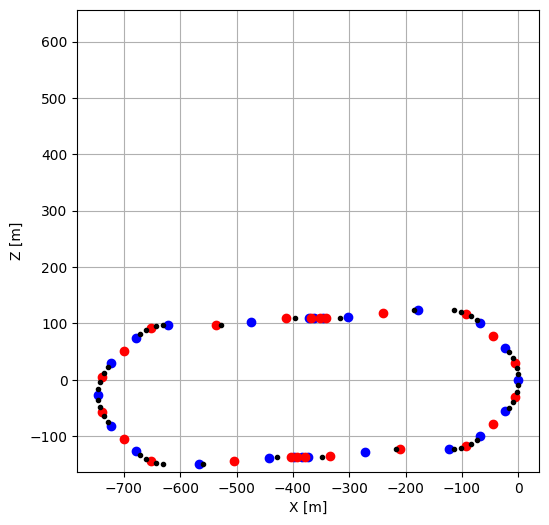

In [249]:
line.particle_ref = xt.Particles(p0c=pc_GeV*1e9, #eV
                                 q0=1, mass0=xt.PROTON_MASS_EV)
context = xo.ContextCpu()
line.build_tracker(_context=context)

mySurvey = line.survey()
mySurvey = mySurvey.rows[r'^(mq|mb).*']

qfSurvey=mySurvey.rows[r'mqf.*']
qdSurvey=mySurvey.rows[r'mqd.*']
mbSurvey=mySurvey.rows[r'mb.*']



fig, ax = plt.subplots(figsize=(9, 6))
plt.plot(qfSurvey.X,qfSurvey.Z,'ob')
plt.plot(qdSurvey.X,qdSurvey.Z,'or')
plt.plot(mbSurvey.X,mbSurvey.Z,'.k')
plt.axis('square')
plt.xlabel('X [m]')
plt.ylabel('Z [m]')
plt.grid()

In [250]:

opt = line.match(
    solve=False,
    method='4d',
    vary=xt.VaryList(['kfl', 'kdl', 'k1fltrip', 'k2dltrip', 
                      'k3fltrip','k1flmatch', 'k2dlmatch', 'k3flmatch', 'thetamatch1', 'thetamatch2'], step=1e-5),
    targets = [xt.TargetSet(qx=ncell/6., qy=ncell/6., tol=1e-6, tag='tune'),
    xt.TargetSet(alfx=0, alfy=0, at=IP),
    xt.TargetSet(bety=0, at=IP, tol=10),
    xt.TargetSet(dx=0, dy=0, at=IP, tol=1e-6)           
    ]
    )

#%%
print('Before match:')
opt.target_status()

opt.solve()

print('After match:')
opt.target_status()

print('\nMatch history')
opt.log()

# %%
knobs_after_match = opt.get_knob_values()
knobs_before_match = opt.get_knob_values(iteration=0)
print(knobs_before_match)

Before match:el call n. 0               
Target status:                          
id state tag  tol_met       residue   current_val    target_val description                                 
0  ON    tune    True  -1.59992e-11       3.33333       3.33333 'qx', val=3.33333, tol=1e-06, weight=10     
1  ON    tune    True   3.56302e-11       3.33333       3.33333 'qy', val=3.33333, tol=1e-06, weight=10     
2  ON            True  -7.02144e-11  -7.02144e-11             0 ('alfx', 55), val=0, tol=1e-09, weight=1 ...
3  ON            True  -2.48285e-10  -2.48285e-10             0 ('alfy', 55), val=0, tol=1e-09, weight=1 ...
4  ON            True            10            10             0 ('bety', 55), val=0, tol=10, weight=1       
5  ON            True   2.90957e-10   2.90957e-10             0 ('dx', 55), val=0, tol=1e-06, weight=10     
6  ON            True            -0            -0             0 ('dy', 55), val=0, tol=1e-06, weight=10     
Matching: model call n. 2               

Afte

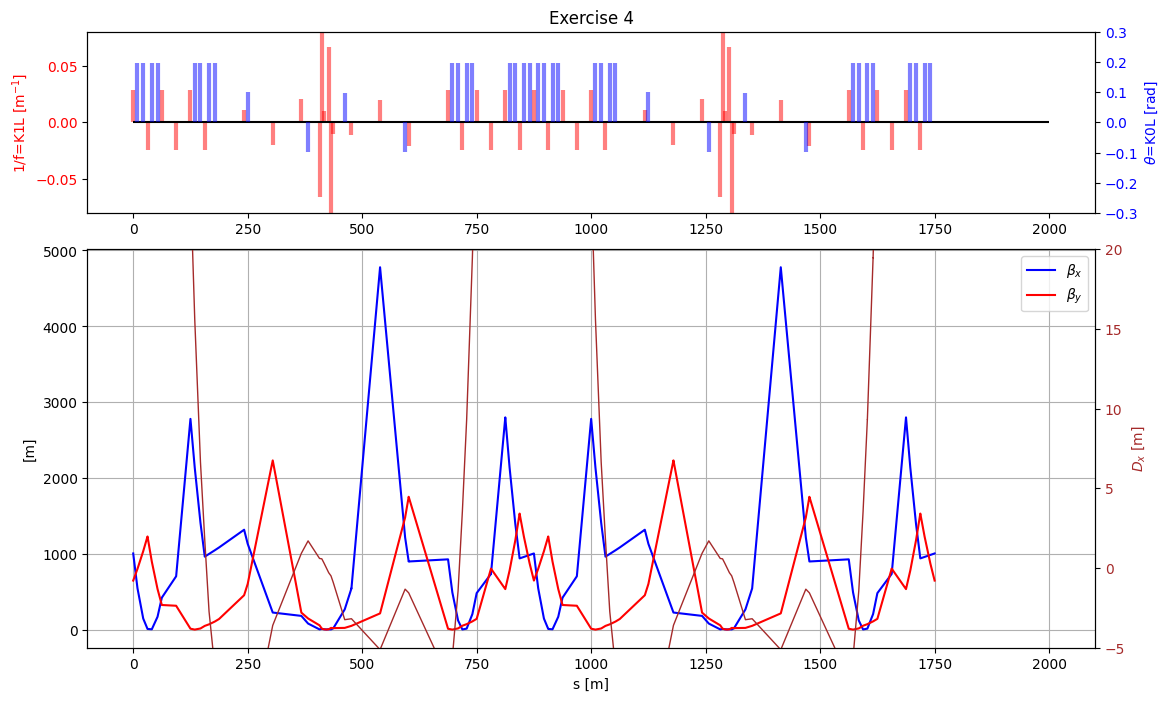

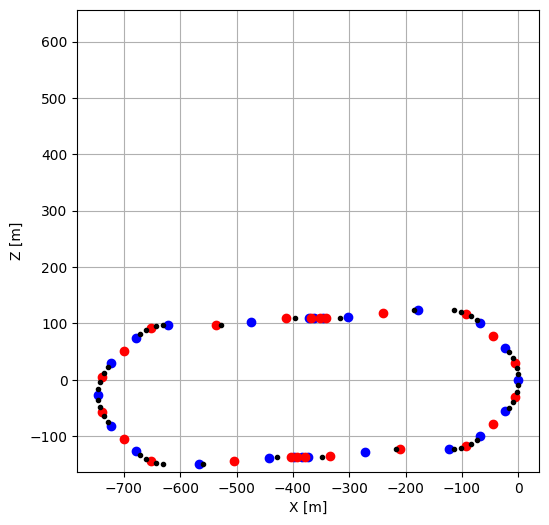

In [264]:
#%%
mytwiss = line.twiss(method="4d")
fig, ax1, ax2, ax3, ax4 = useful_plots(line, mytwiss, filter_elements="Multipole")
# %%
mySurvey = line.survey()
mySurvey = mySurvey.rows[r'^(mq|mb).*']

qfSurvey=mySurvey.rows[r'mqf.*']
qdSurvey=mySurvey.rows[r'mqd.*']
mbSurvey=mySurvey.rows[r'mb.*']



fig, ax = plt.subplots(figsize=(9, 6))
plt.plot(qfSurvey.X,qfSurvey.Z,'ob')
plt.plot(qdSurvey.X,qdSurvey.Z,'or')
plt.plot(mbSurvey.X,mbSurvey.Z,'.k')
plt.axis('square')
plt.xlabel('X [m]')
plt.ylabel('Z [m]')
plt.grid()

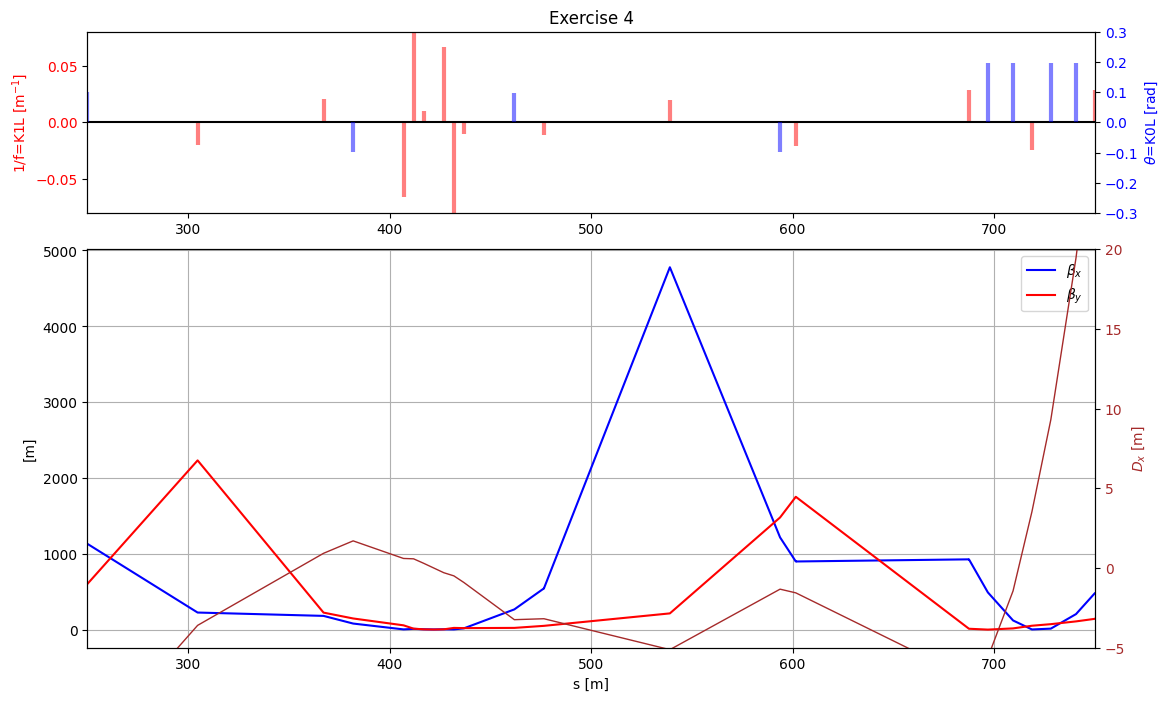

In [265]:
fig, ax1, ax2, ax3, ax4 = useful_plots(line, mytwiss, filter_elements="Multipole", xlim=[250,500])